# Neural Network 
# Assignment: Forest Fires

## Problem Statement

__classify the Size_Categorie using SVM__

month ->	 month of the year: 'jan' to 'dec'

day	 ->    day of the week: 'mon' to 'sun'

FFMC  ->   FFMC index from the FWI system: 18.7 to 96.20

DMC	  ->    DMC index from the FWI system: 1.1 to 291.3

DC	  ->    DC index from the FWI system: 7.9 to 860.6

ISI	   ->   ISI index from the FWI system: 0.0 to 56.10

temp	->  temperature in Celsius degrees: 2.2 to 33.30

RH	   ->   relative humidity in %: 15.0 to 100

wind	->  wind speed in km/h: 0.40 to 9.40

rain	->  outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

Looks like the data already have dummy variables for months and days of week. 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
df = data.drop_duplicates()
df.shape

(509, 31)

In [9]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

__Note:__ for our data analysis, let us not consider dummy variable for now. 

In [10]:
df_n = df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area','size_category']]

In [11]:
df_n.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [12]:
numerical_features = df_n.select_dtypes(include = ['int64', 'float64']).columns

In [13]:
numerical_features

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

In [14]:
discrete_feature = [feature for feature in numerical_features if len(df_n[feature].unique())<25]
print('Discrete variables count: {}'.format(len(discrete_feature)))

Discrete variables count: 2


In [15]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Continous variables count: {}'.format(len(continous_feature)))

Continous variables count: 7


In [16]:
categorical = [feature for feature in df_n.columns if feature not in numerical_features]
print('Categorical variable count: {}'. format(len(categorical)))

Categorical variable count: 3


__frequency counts of the categorical variables__

In [17]:
for var in categorical:
    print(df[var].value_counts())

month
aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
day
sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: count, dtype: int64
size_category
small    371
large    138
Name: count, dtype: int64


__note:__ major number of forest fires happened in the month of august and september. So, there got to be some environmental phenomenon which peaks around these months. 

Majority number of forest fires were small but there are significant number of larger forest fires also. 

__Frequency distribution of categorical variables__

In [18]:
for var in categorical:
    print(df[var].value_counts()/(len(df)))

month
aug    0.349705
sep    0.337917
mar    0.104126
jul    0.062868
feb    0.039293
jun    0.031434
oct    0.029470
apr    0.017682
dec    0.017682
jan    0.003929
may    0.003929
nov    0.001965
Name: count, dtype: float64
day
sun    0.184676
fri    0.163065
sat    0.161100
mon    0.145383
tue    0.123772
thu    0.117878
wed    0.104126
Name: count, dtype: float64
size_category
small    0.72888
large    0.27112
Name: count, dtype: float64


So, here we can see that about 72% forest fires were small and around 27% were large. 

Moreover, 35+33 = 68% of forest fires took place in the month of August and September. 

Speaking of daywise distribution, there is not much significant difference, though sunday conincidently happen to have the maximun share of forest fires.

In [19]:
# Checking for cardinality

for var in categorical:
    print(var, 'contains ', len(df[var].unique()), 'labels')

month contains  12 labels
day contains  7 labels
size_category contains  2 labels


In [20]:
df_n.corr(numeric_only = True)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


# Data Visualization

<Axes: >

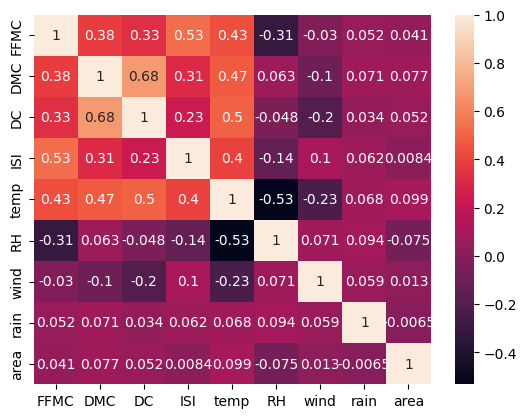

In [21]:
sns.heatmap(df_n.corr(numeric_only = True), annot = True)

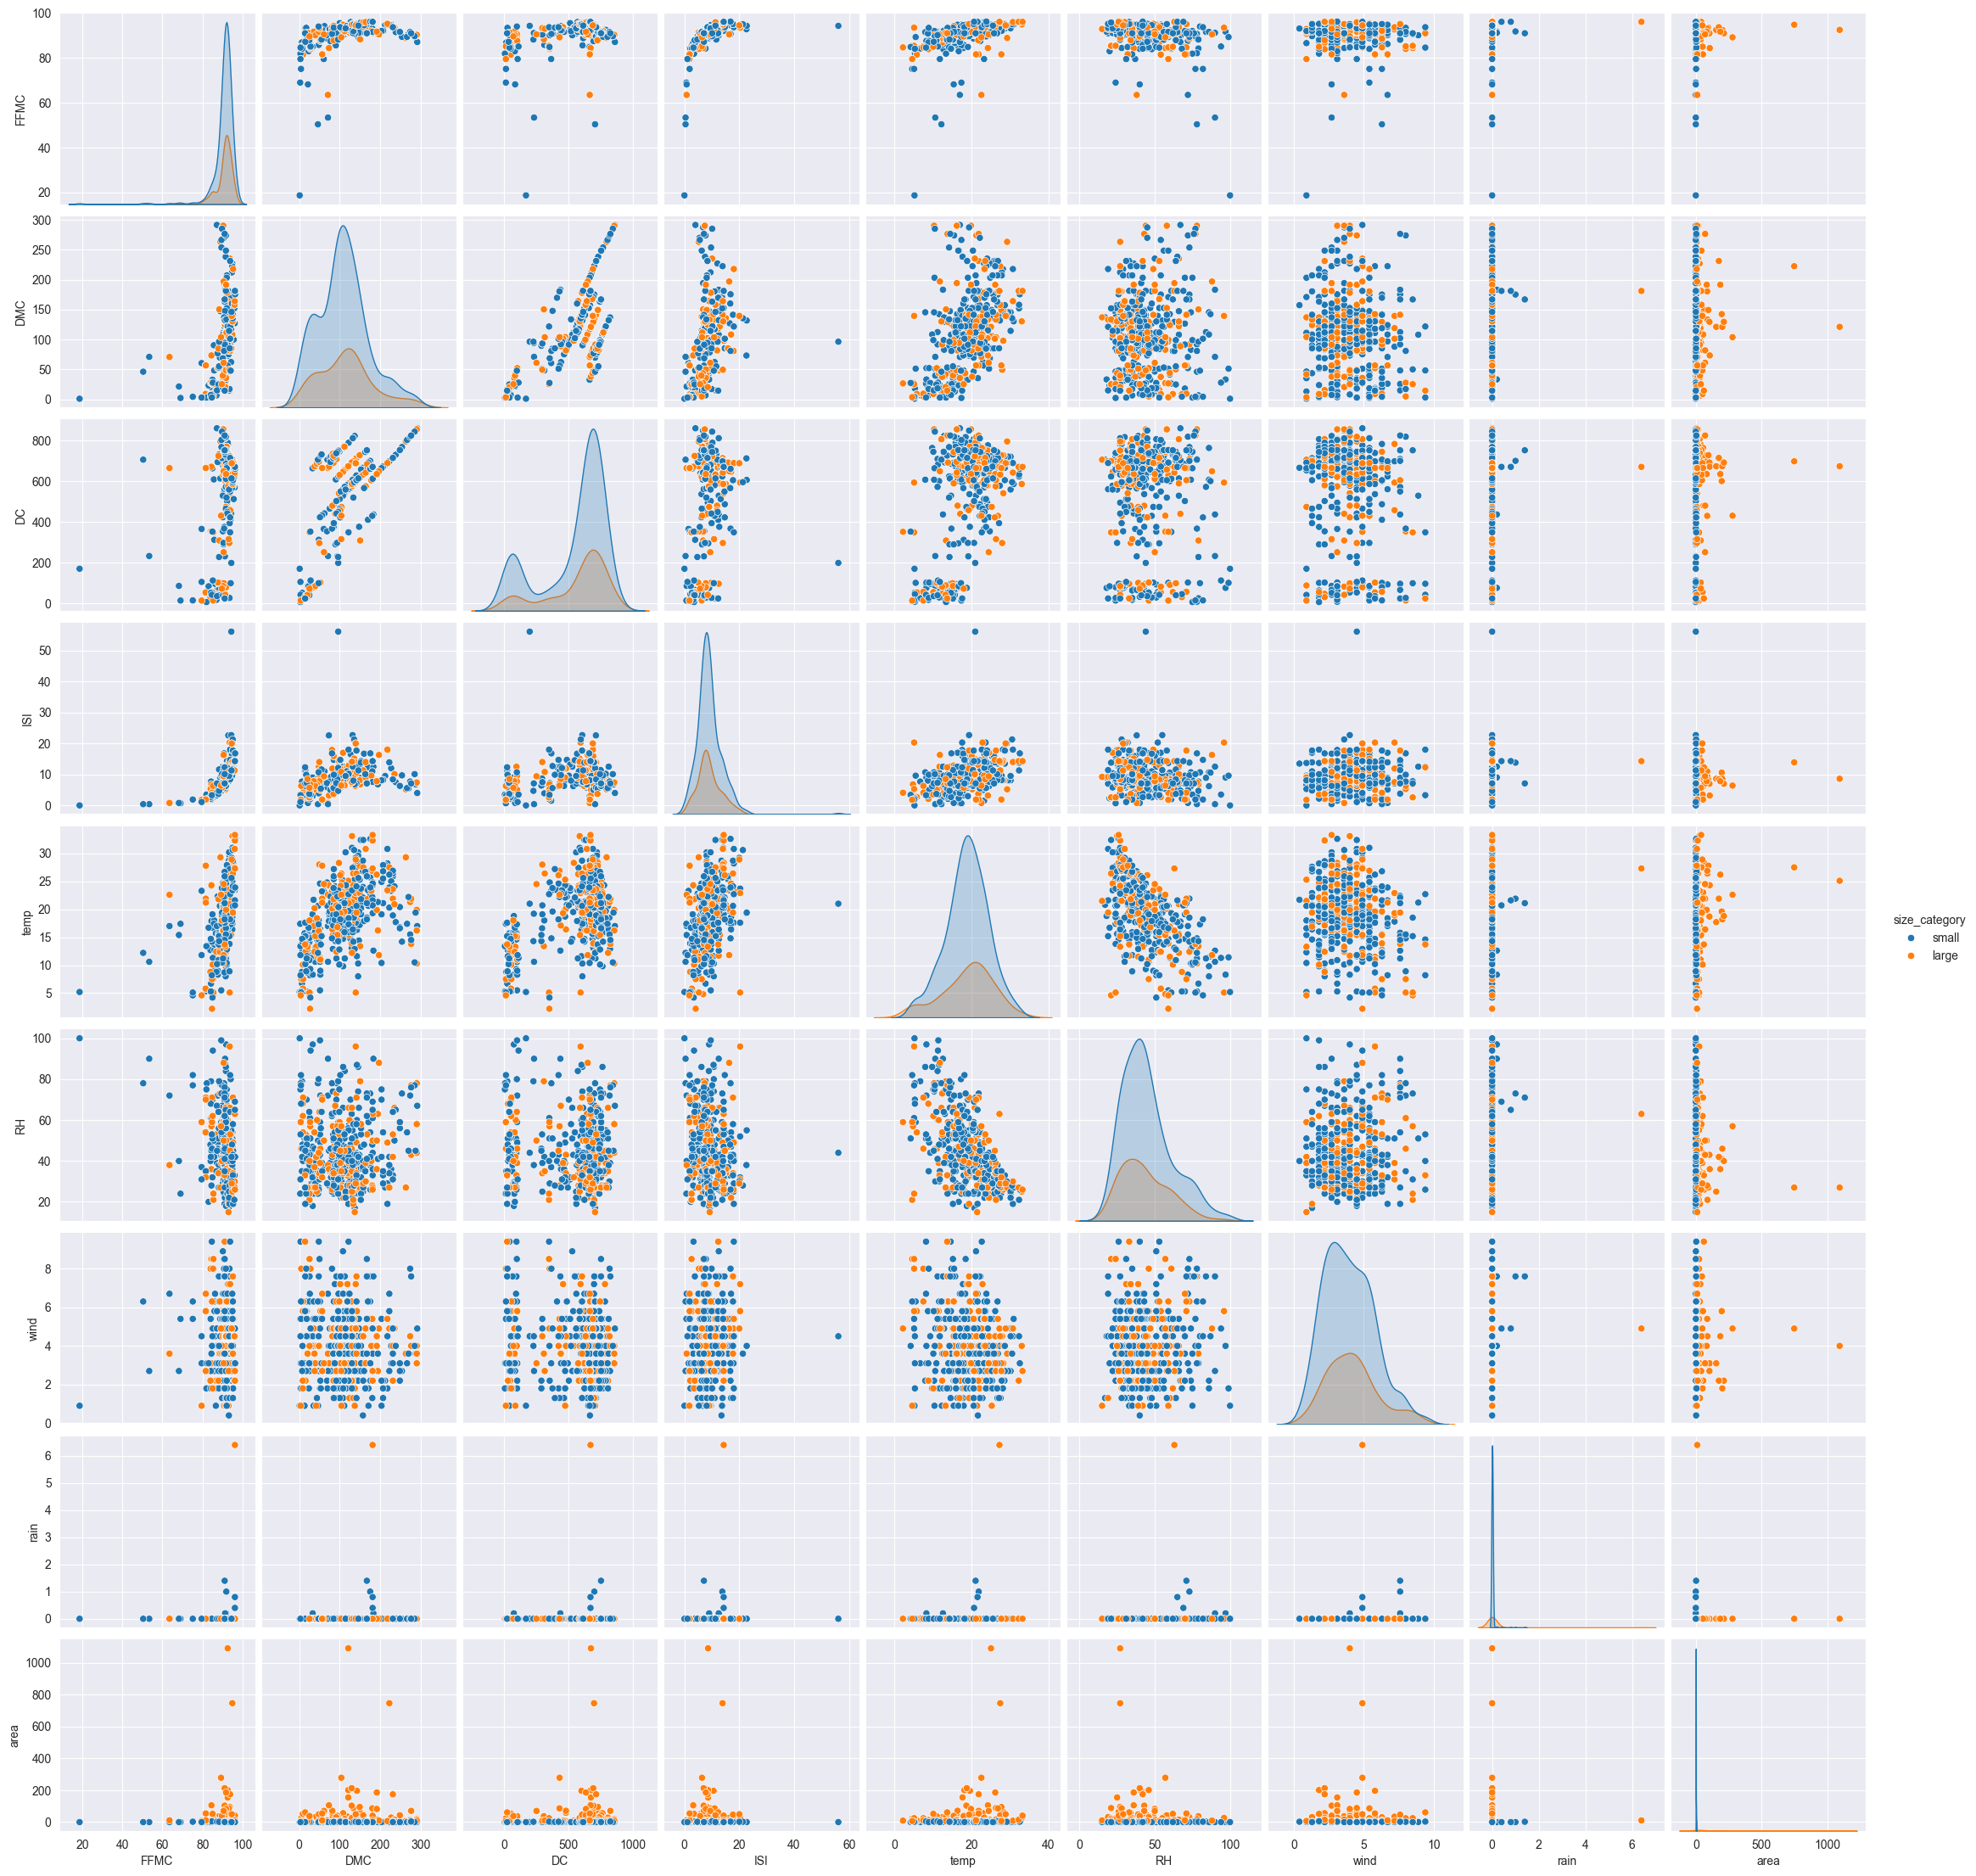

In [22]:
sns.set_style('darkgrid')
sns.pairplot(df_n, hue = 'size_category')
plt.show()

## Univariate analysis

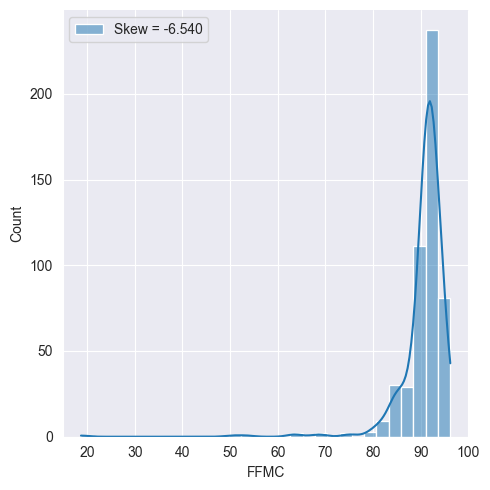

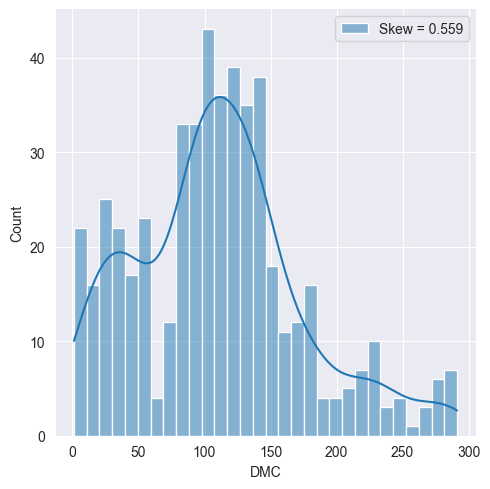

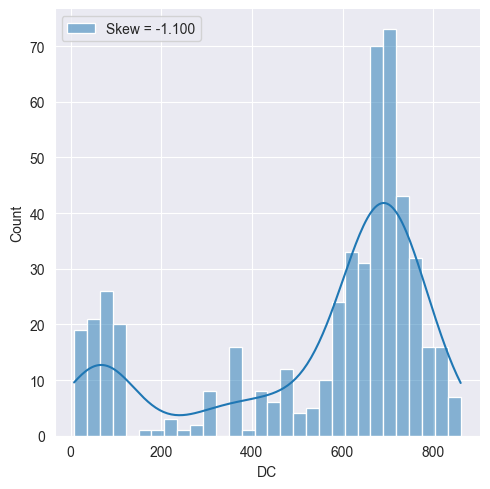

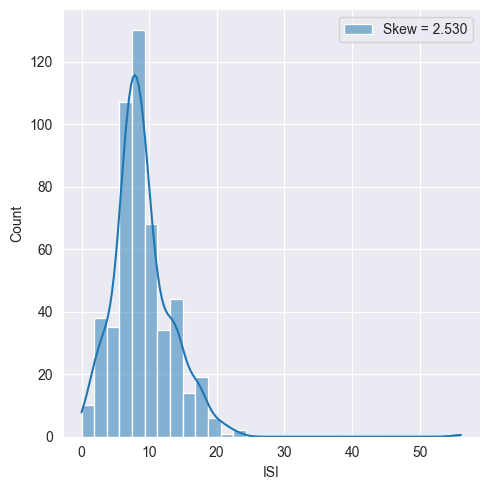

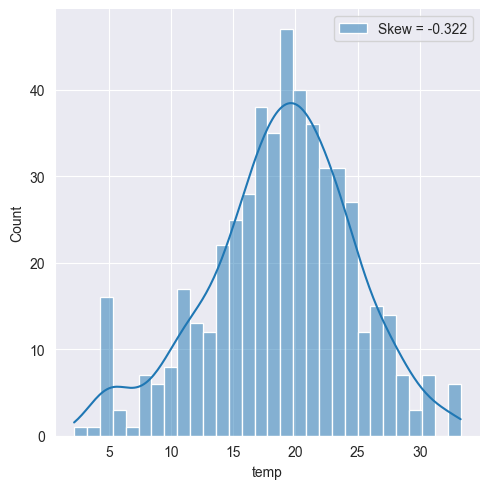

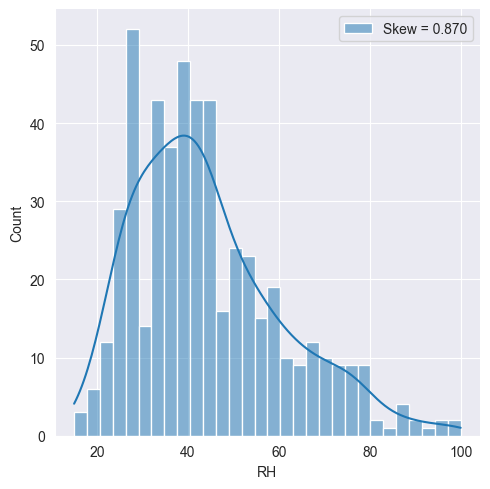

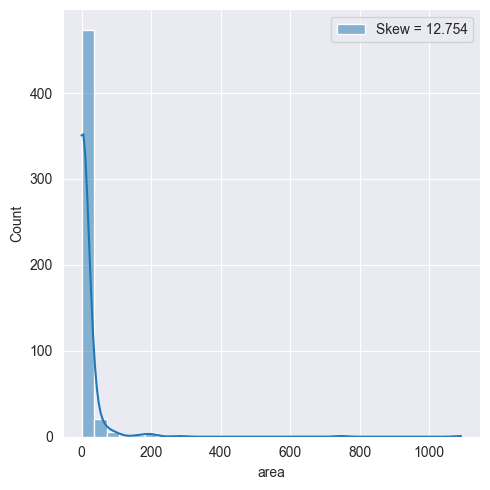

In [23]:
for var in continous_feature:
    skew = df_n[var].skew()
    sns.displot(df_n[var], kde = True, label = 'Skew = %.3f' %(skew), bins = 30)
    plt.legend(loc = 'best')
    plt.show()

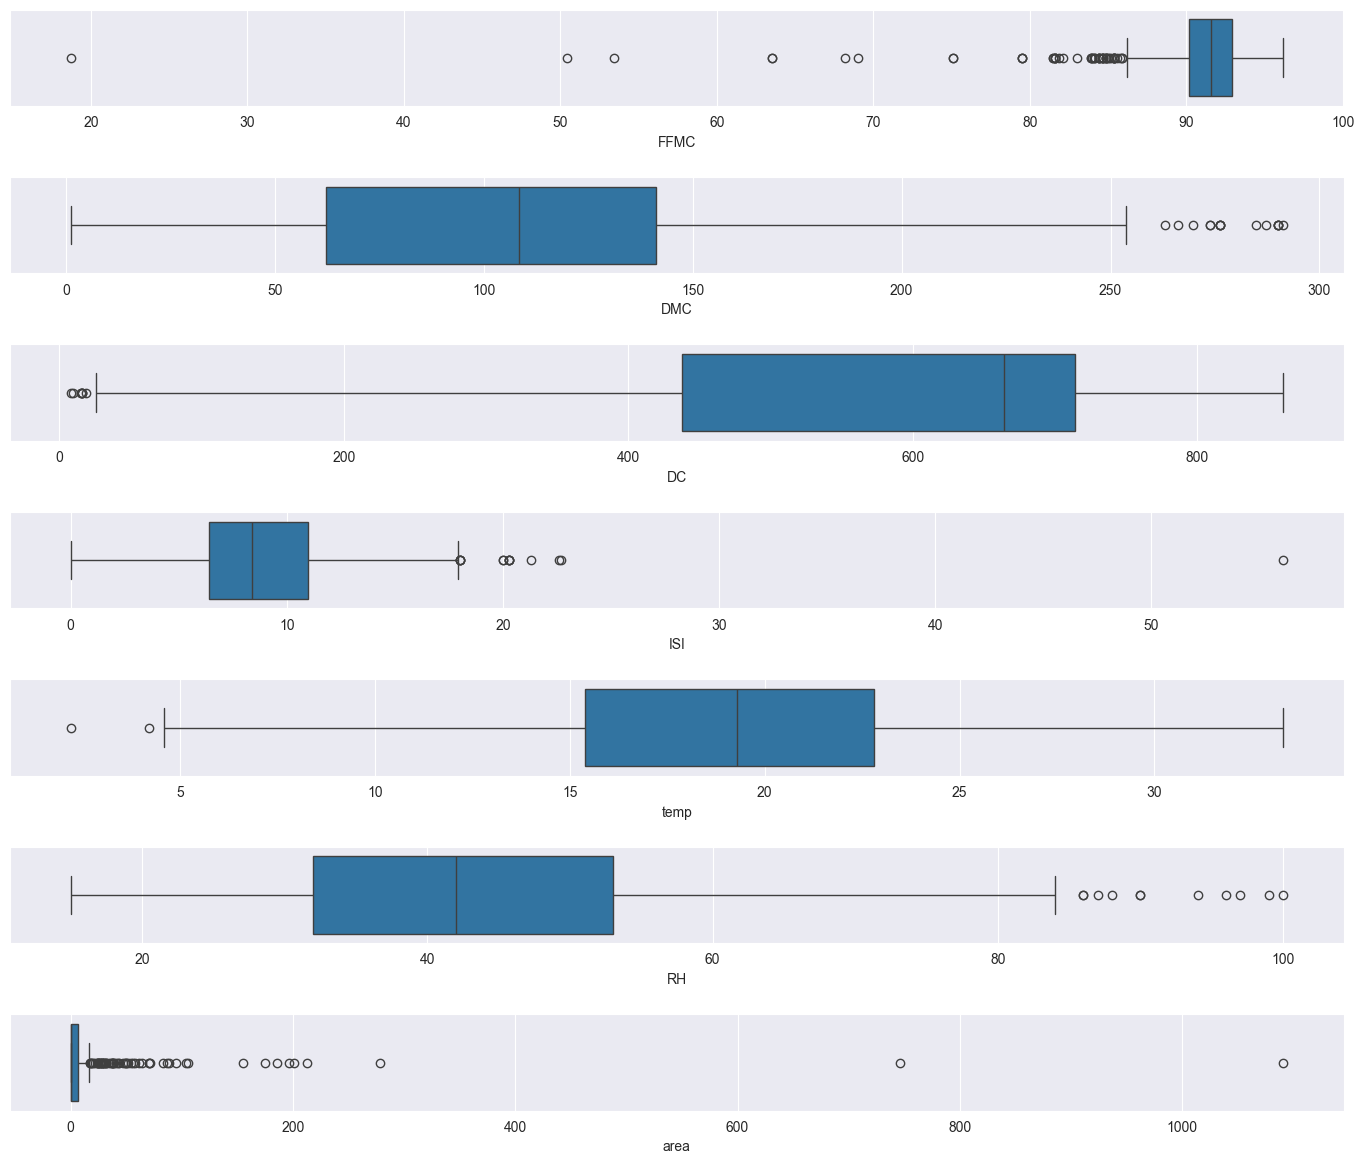

In [24]:
fig, axes = plt.subplots(7,1, figsize = (14,12), sharex = False, sharey = False)
i = 0
for var in continous_feature:
    sns.boxplot(x = var, data = df_n, ax = axes[i])
    i += 1
plt.tight_layout(pad = 2.0)
plt.show()

In [25]:
data = df_n.copy()
for var in continous_feature:
    data[var] = np.log(data[var])

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


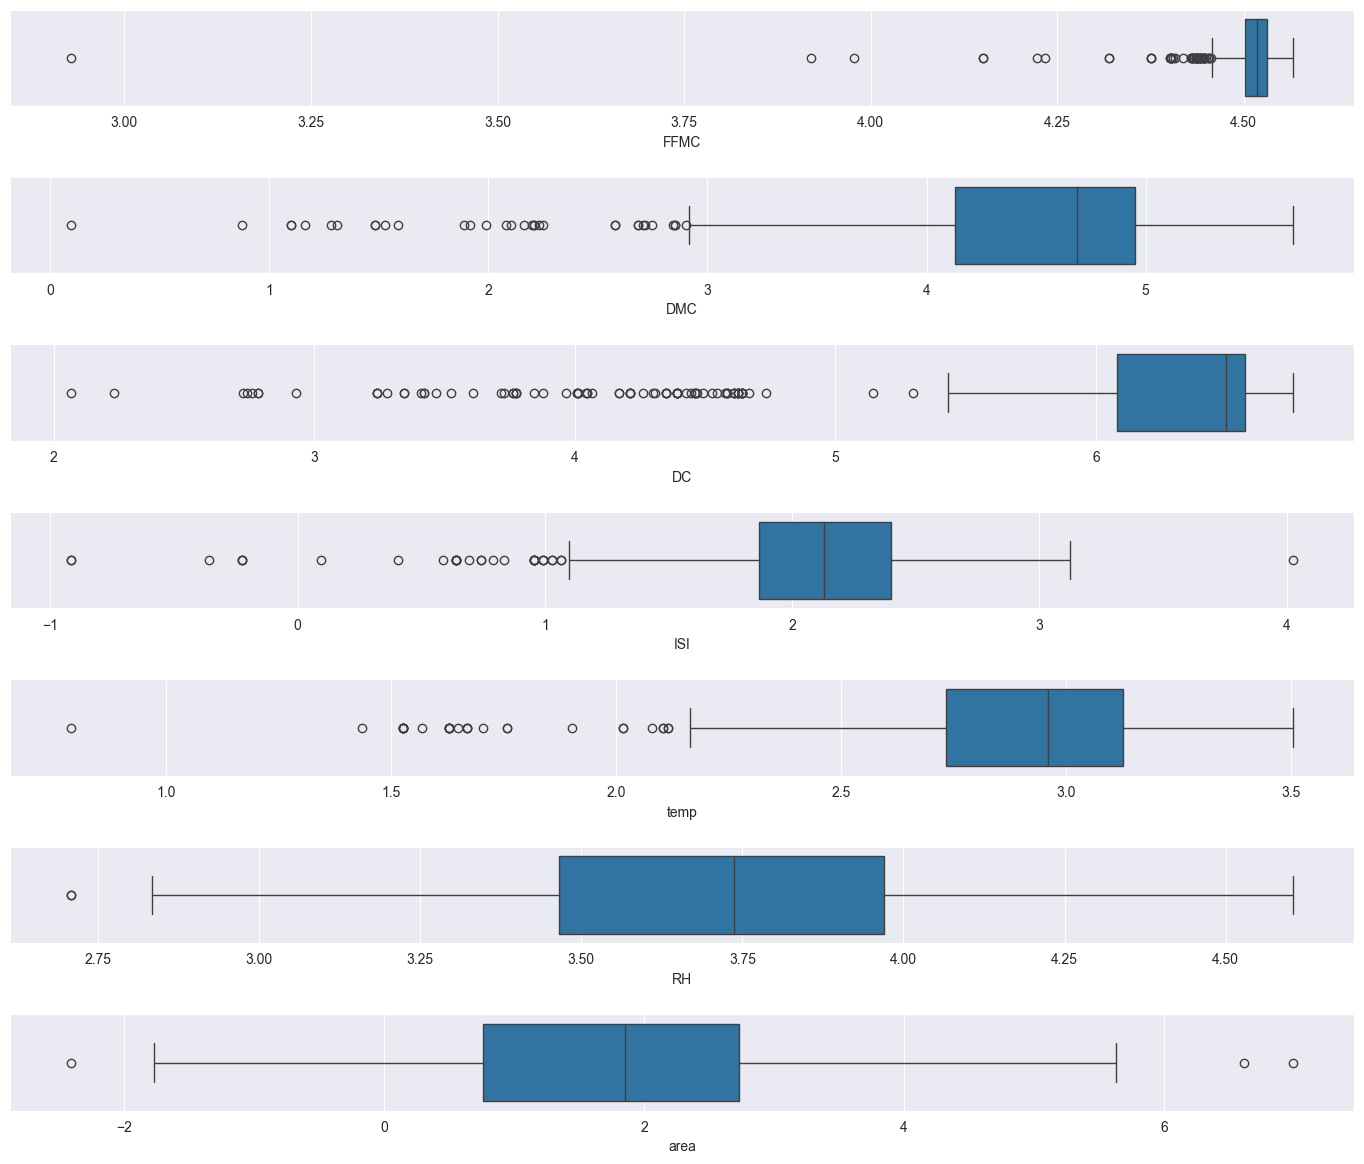

In [26]:
fig, axes = plt.subplots(7,1, figsize = (14,12), sharex = False, sharey = False)
i = 0
for var in continous_feature:
    sns.boxplot(x = var, data = data, ax = axes[i])
    i += 1
plt.tight_layout(pad = 2.0)
plt.show()

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


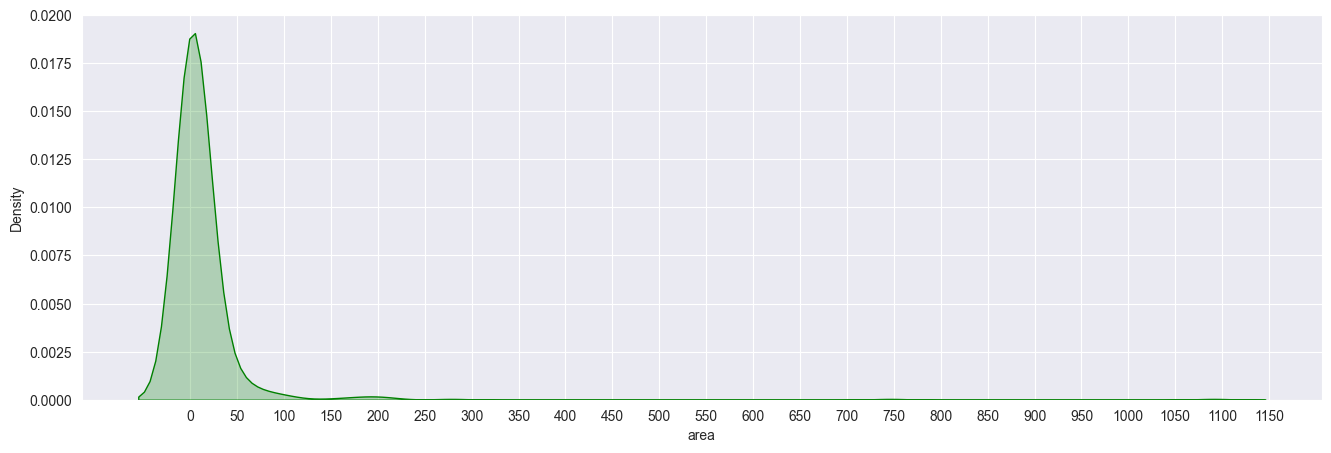

In [27]:
plt.figure(figsize = (16,5))
print('Skew: {}'.format(df_n['area'].skew()))
print('Kurtosis: {}'.format(df_n['area'].kurtosis()))
ax = sns.kdeplot(df_n['area'], fill = True, color = 'g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

__Observation:__

The data is highly skewed, and majority of the forest fires do not cover a large area. Most of the damage area is under 50 hectares of land. 

## Categorical variable

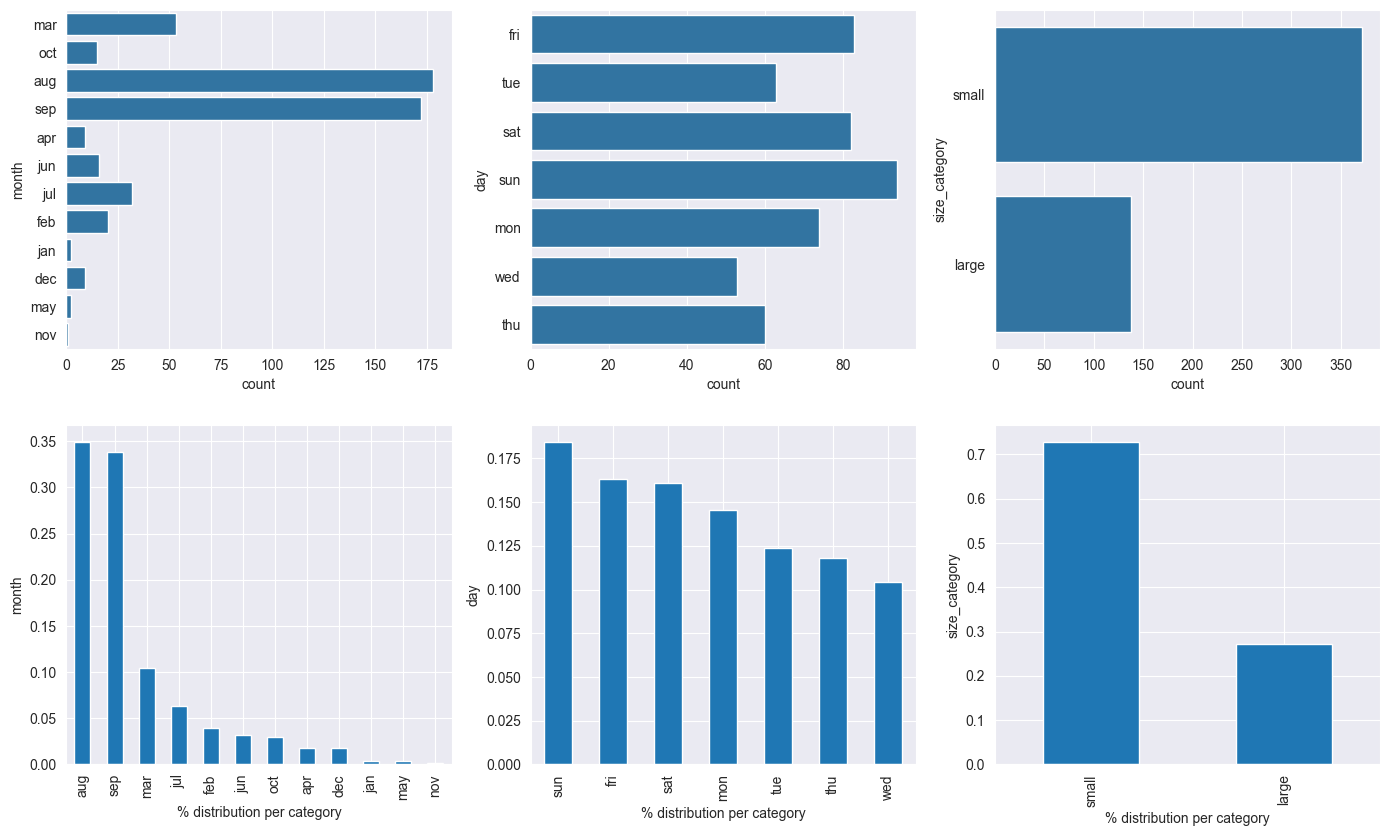

In [28]:
plt.figure(figsize = (14,12))
for i, col in enumerate(categorical):
    j = i + 1
    plt.subplot(3,3,j)
    sns.countplot(data = df_n, y = col)
    plt.subplot(3,3,j+3)
    df_n[col].value_counts(normalize = True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

## Bivariate analysis

In [29]:
print(df_n['area'].describe(), '\n')

count     509.000000
mean       12.992908
std        64.133357
min         0.000000
25%         0.000000
50%         0.610000
75%         6.580000
max      1090.840000
Name: area, dtype: float64 



In [30]:
dn = df_n.copy()
def area_cat(area):
    if area == 0.0:
        return 'No Damage'
    elif area <= 1:
        return 'low'
    elif area <=25:
        return 'moderate'
    elif area <= 100:
        return 'high'
    else:
        return 'very high'

In [31]:
dn['damage_cat'] = dn['area'].apply(area_cat)
dn.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_cat
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No Damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No Damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No Damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No Damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No Damage


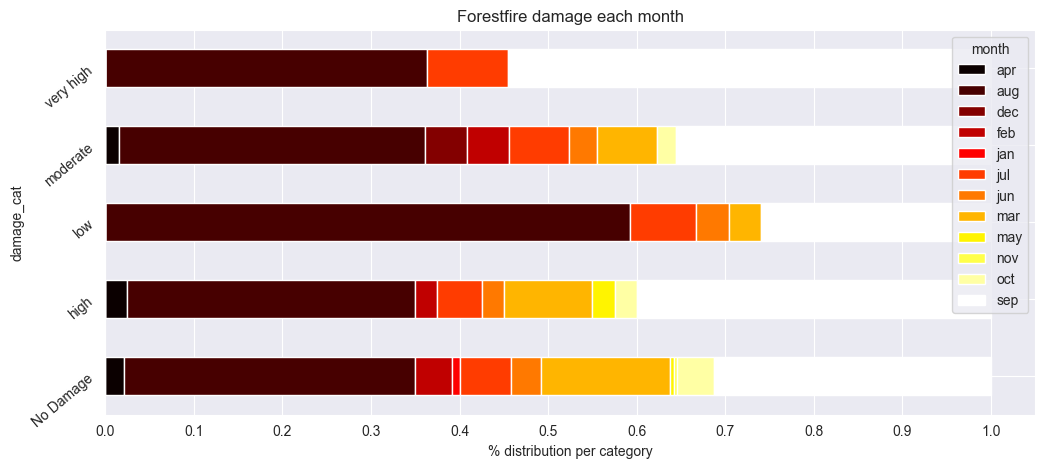

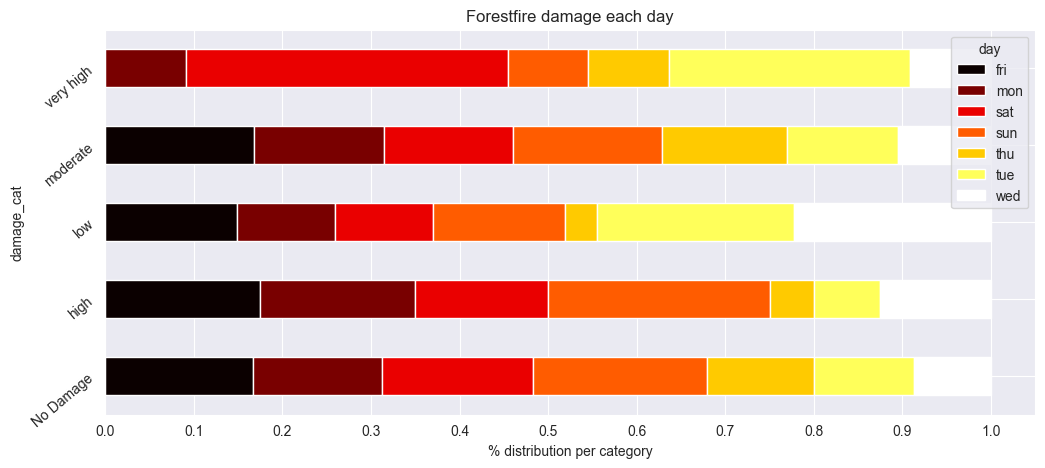

In [32]:
for col in categorical:
    if col != 'size_category':
        cross = pd.crosstab(index = dn['damage_cat'], columns = df[col], normalize = 'index')
        cross.plot.barh(stacked = True, rot = 40, cmap = 'hot', figsize = (12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.title('Forestfire damage each {}'.format(col))

plt.show()

__obseravtion:__

Previously, we had observed that August and September had the most number of forest fires. 

- most number of forest fires in august were low, which means less than 1 hectare
- very high damage happened in only in the month of september, august and janurary, and that too in the order: September > August > Jan

Also, no clear conclusion that we can draw from the days data. 

Text(0, 0.5, 'Temperature')

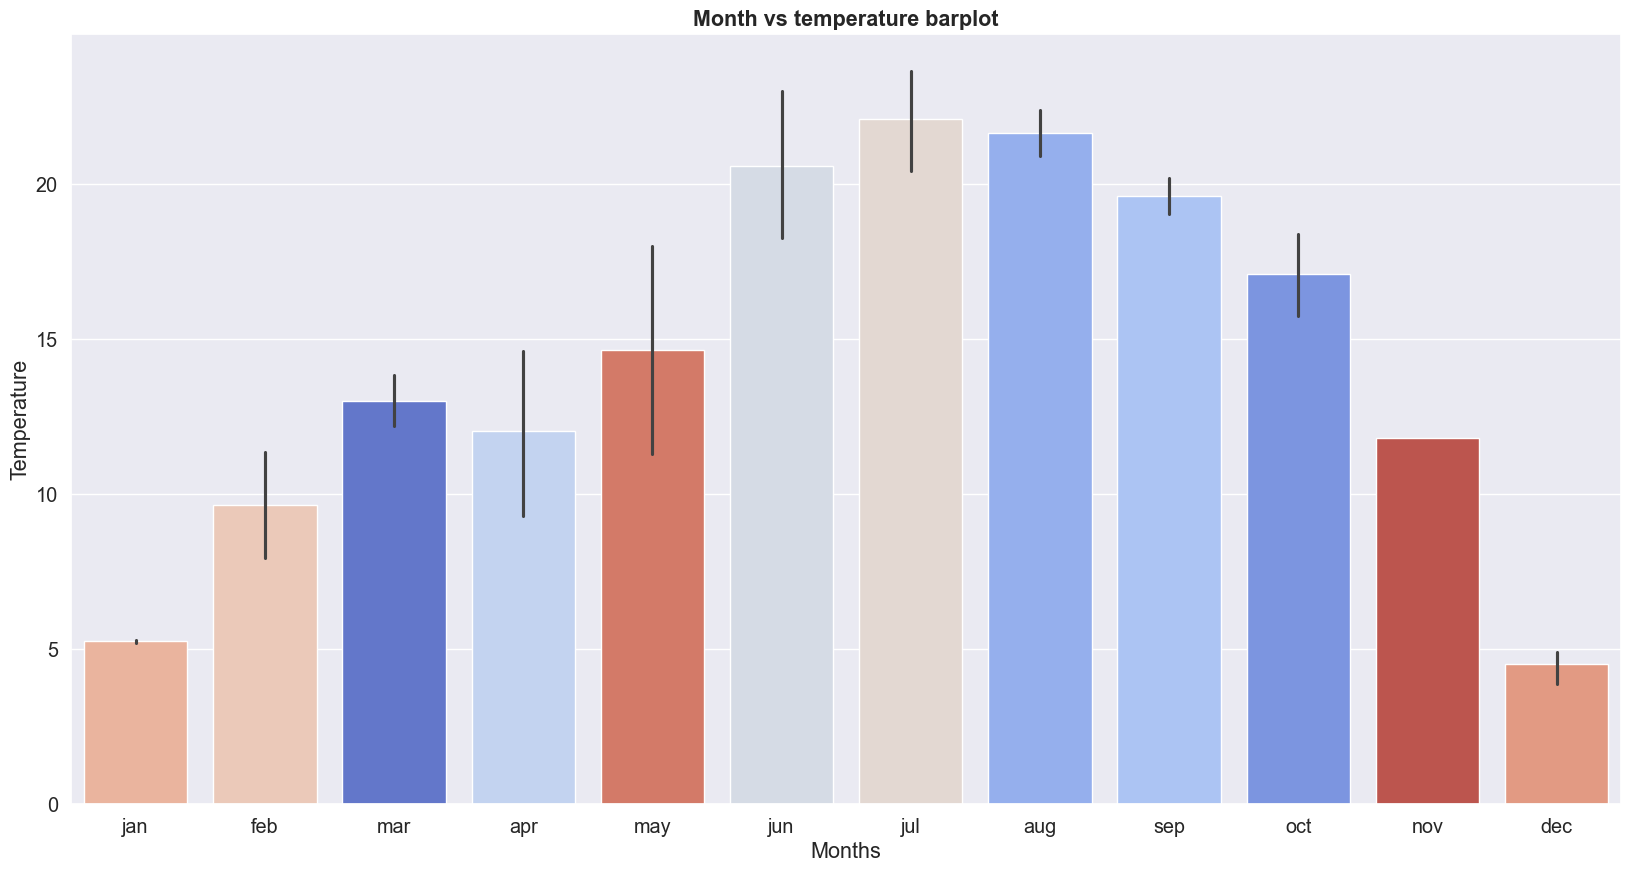

In [33]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'darkgrid', font_scale = 1.3)
sns.barplot(x = 'month', y = 'temp', data = df_n, 
             order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
            hue = 'month', palette = 'coolwarm')
plt.title('Month vs temperature barplot', fontweight = 'bold')
plt.xlabel('Months')
plt.ylabel('Temperature')

## Visualize the large forest fire size rate by month

In [34]:
df1=df_n.copy()
order={'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,count,% Small Forest Fire,% Large Forest Fire
month,,,
January,2,100.000000,0.000000
February,20,70.000000,30.000000
March,53,79.245283,20.754717
April,9,77.777778,22.222222
May,2,50.000000,50.000000
June,16,81.250000,18.750000
July,32,71.875000,28.125000
August,178,75.842697,24.157303
September,172,70.348837,29.651163


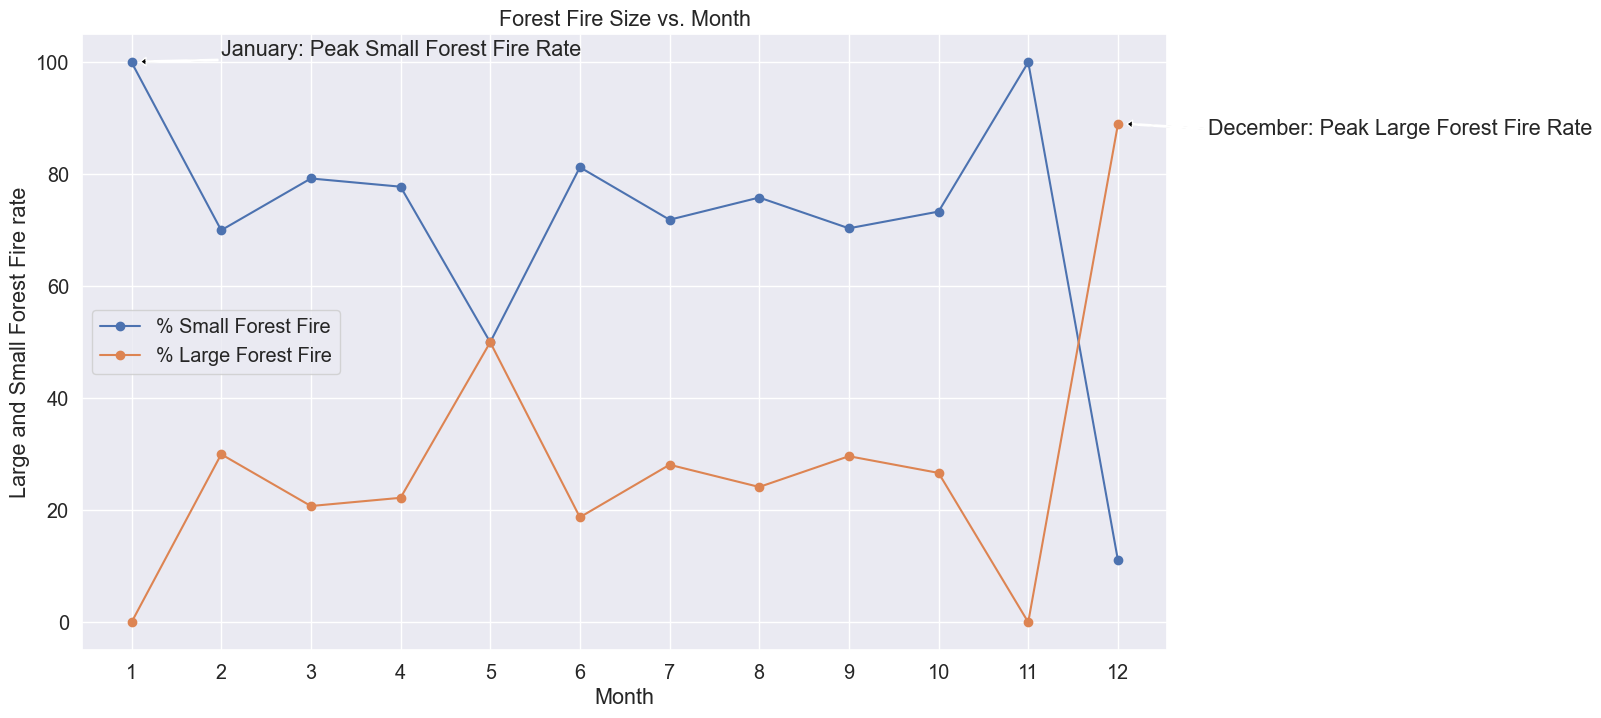

In [35]:
# Step 4: Change 'month' from words to numbers for easier analysis
df1=df_n.copy()
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line',
                                                          figsize = (14,8),
                                                          marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

## Analysis of response column

In [36]:
countsizesmall = len(df_n[df_n.size_category == 'small'])
countsizelarge = len(df_n[df_n.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(df_n.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(df_n.size_category))*100)))

Percentage of Small Forest Fire Size: 72.89%
Percentage of Large Foreset Fire Size: 27.11%


In [37]:
df_n.size_category.value_counts()

size_category
small    371
large    138
Name: count, dtype: int64

Text(0.5, 1.0, 'Foeest Fire Size Category')

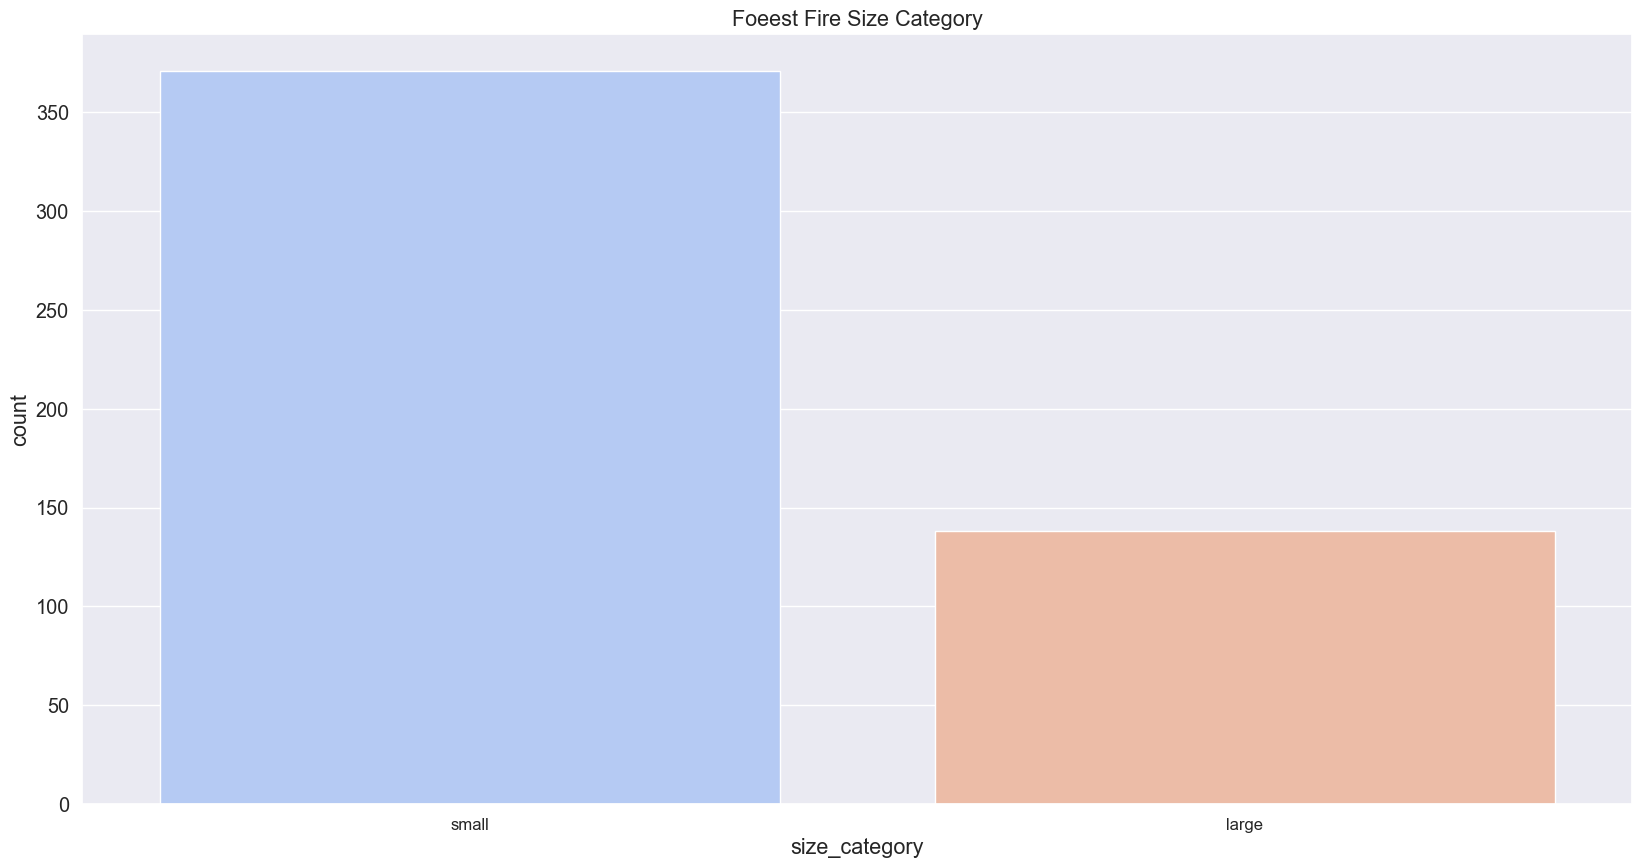

In [38]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=df_n,hue = 'size_category', palette = 'coolwarm', 
              order=df_n['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Foeest Fire Size Category')

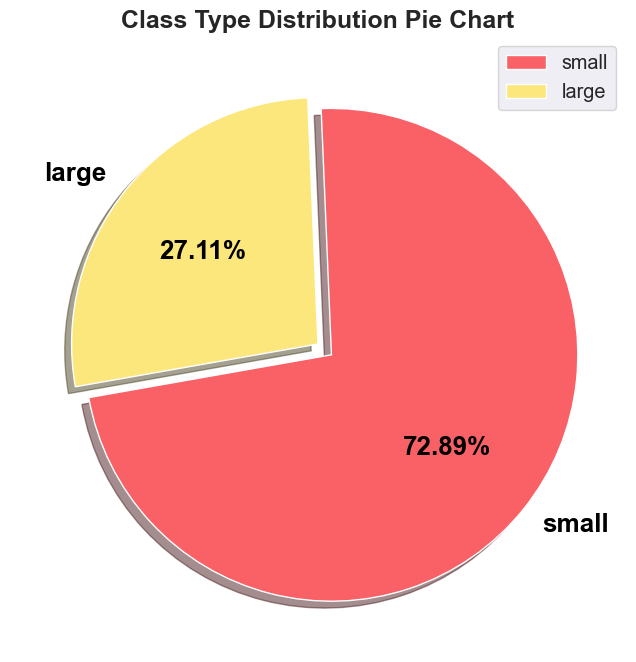

In [39]:
plt.figure(figsize = (12,8))
plt.pie(df_n['size_category'].value_counts(),
       labels=df_n.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

__Note:__ Beacause the data in imbalanced, so we have to balance the data using the SMOTE technique

# Pre-processing of data

In [40]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [41]:
df[numerical_features].head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [42]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [43]:
df2 = df.copy()
df2.drop(['month','day','size_category'], axis =1, inplace = True)
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
df2.isnull().sum()

FFMC        0
DMC         0
DC          0
ISI         0
temp        0
RH          0
wind        0
rain        0
area        0
dayfri      0
daymon      0
daysat      0
daysun      0
daythu      0
daytue      0
daywed      0
monthapr    0
monthaug    0
monthdec    0
monthfeb    0
monthjan    0
monthjul    0
monthjun    0
monthmar    0
monthmay    0
monthnov    0
monthoct    0
monthsep    0
dtype: int64

We already have the dummy variable for the month and the day column, so we are all set. and there is no missing value also. so we are good to go.

In [45]:
df2['size_category'] = df.size_category
df2['size_category'] = np.where(df2['size_category'].str.contains("large"), 1, 0)
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
df_std = df2.copy()
features = df_std[numerical_features]

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
df_std[numerical_features] = scaler.fit_transform(features.values)
df_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,0,...,0,0,0,0,0,0,0,1,0,0
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,1,...,0,0,0,0,1,0,0,0,0,0
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,0,...,0,0,0,0,1,0,0,0,0,0


# Train and test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [54]:
# split into input (X) and output (y) variables
x = df2.drop('size_category', axis = 1)

y=  df2.size_category

In [55]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [56]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [57]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
8,15510.269159,area
2,45.986882,DC
1,40.734806,DMC
18,17.381104,monthdec
7,6.237364,rain
5,4.852902,RH
6,1.454745,wind
23,1.083925,monthmar
13,0.900285,daythu
17,0.786364,monthaug


Here, the days dummy variable might be mis-leading, but we know from the previous analysis what for some non obvious reasons, forest fire is more from friday to monday. 

Monthly hikes still makes more sense due to weather changes. 

So, I'd prefer to omit the days variable from the analysis. And simply focus on the rest of the variable which have some known influence on the data.

Moreover, the factors like ISI, temp and FFMC, which have a very low score can be omitted. 

In [83]:
model_data=df_std[['DMC','DC','RH','rain','wind','area','monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan',
       'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-1.318386,-1.828931,0.412656,-0.069035,1.494370,-0.202791,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.174053,0.489257,-0.688321,-0.069035,-1.729364,-0.202791,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.043839,0.561045,-0.688321,-0.069035,-1.507037,-0.202791,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.206998,-1.896686,3.226265,0.606709,-0.006333,-0.202791,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.924607,-1.797070,3.348596,-0.069035,-1.229129,-0.202791,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.839890,0.475141,-0.749487,-0.069035,-0.728894,-0.102277,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.839890,0.475141,1.635965,-0.069035,0.994136,0.644559,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.839890,0.475141,1.574799,-0.069035,1.494370,-0.028608,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.561083,0.269860,-0.137832,-0.069035,-0.006333,-0.202791,0,1,0,0,0,0,0,0,0,0,0,0,0


In [84]:
x = model_data.drop('size_category', axis = 1)
y = model_data['size_category']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101, stratify = y)

In [86]:
len(x_train.columns)

18

# Hyperparameter Tuning

## Hyperparamter Tuning: Optimal learning rate, number of layers and neurons

In [87]:
from keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import np_utils
from keras.constraints import MaxNorm

In [88]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [89]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,  executions_per_trial=3,directory='project',project_name='Forest Fire_n')

In [90]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [91]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))  

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.9520697196324667

Best val_accuracy So Far: 0.9520697196324667
Total elapsed time: 00h 03m 19s


In [92]:
tuner.results_summary()

Results summary
Results in project\Forest Fire_n
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 96
learning_rate: 0.01
units_2: 96
units_3: 96
units_4: 64
units_5: 96
units_6: 32
units_7: 32
units_8: 64
units_9: 96
units_10: 96
units_11: 64
units_12: 32
units_13: 64
units_14: 32
units_15: 96
units_16: 32
Score: 0.9520697196324667

Trial 3 summary
Hyperparameters:
num_layers: 6
units_0: 32
units_1: 32
learning_rate: 0.01
units_2: 64
units_3: 32
units_4: 64
units_5: 32
units_6: 32
units_7: 96
units_8: 64
units_9: 64
units_10: 64
units_11: 32
units_12: 64
units_13: 32
units_14: 32
units_15: 32
units_16: 96
Score: 0.9477124214172363

Trial 1 summary
Hyperparameters:
num_layers: 17
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 64
units_3: 32
units_4: 64
units_5: 32
units_6: 64
units_7: 96
units_8: 64
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
un

## Hyperparameter tuning: optimal batch_size, number of epochs

In [93]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [95]:
from scikeras.wrappers import KerasRegressor, KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV

In [96]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [98]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.545 total time=   3.2s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.635 total time=   1.6s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.463 total time=   2.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.819 total time=   2.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.563 total time=   1.4s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.943 total time=   4.3s
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/16] END ....batch_size=10, epochs=50;, score=0.820 total time=   3.8s
[CV 3/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/16] END ....batch_size=10, epochs=50;, score=0.756 total time=   2.7s
[CV 4/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/16] END ....batch_size=10, epochs=50;, score=0.840 total time=   4.2s
[CV 5/5; 2/16] START batch_size=10, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/16] END ....batch_size=10, epochs=50;, score=0.831 total time=   3.4s
[CV 1/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/16] END ...batch_size=10, epochs=100;, score=0.718 total time=   5.4s
[CV 2/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/16] END ...batch_size=10, epochs=100;, score=0.852 total time=   6.1s
[CV 3/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/16] END ...batch_size=10, epochs=100;, score=0.487 total time=   6.3s
[CV 4/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/16] END ...batch_size=10, epochs=100;, score=0.843 total time=   6.1s
[CV 5/5; 3/16] START batch_size=10, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/16] END ...batch_size=10, epochs=100;, score=0.595 total time=   5.5s
[CV 1/5; 4/16] START batch_size=10, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/16] END ...batch_size=10, epochs=200;, score=0.989 total time=   8.1s
[CV 2/5; 4/16] START batch_size=10, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/16] END ...batch_size=10, epochs=200;, score=0.905 total time=   9.4s
[CV 3/5; 4/16] START batch_size=10, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/16] END ...batch_size=10, epochs=200;, score=0.793 total time=   8.6s
[CV 4/5; 4/16] START batch_size=10, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/16] END ...batch_size=10, epochs=200;, score=0.842 total time=   9.1s
[CV 5/5; 4/16] START batch_size=10, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/16] END ...batch_size=10, epochs=200;, score=0.982 total time=  10.1s
[CV 1/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/16] END ....batch_size=20, epochs=10;, score=0.664 total time=   3.0s
[CV 2/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/16] END ....batch_size=20, epochs=10;, score=0.536 total time=   2.4s
[CV 3/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.451 total time=   2.9s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=0.844 total time=   1.9s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.621 total time=   2.8s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.999 total time=   2.3s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=0.753 total time=   3.8s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.621 total time=   2.8s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=0.899 total time=   2.9s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/16] END ....batch_size=20, epochs=50;, score=0.759 total time=   2.7s
[CV 1/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/16] END ...batch_size=20, epochs=100;, score=1.000 total time=   3.6s
[CV 2/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/16] END ...batch_size=20, epochs=100;, score=0.578 total time=   4.5s
[CV 3/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/16] END ...batch_size=20, epochs=100;, score=0.627 total time=   4.5s
[CV 4/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/16] END ...batch_size=20, epochs=100;, score=0.815 total time=   4.0s
[CV 5/5; 7/16] START batch_size=20, epochs=100..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/16] END ...batch_size=20, epochs=100;, score=0.722 total time=   3.1s
[CV 1/5; 8/16] START batch_size=20, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/16] END ...batch_size=20, epochs=200;, score=0.852 total time=   6.6s
[CV 2/5; 8/16] START batch_size=20, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/16] END ...batch_size=20, epochs=200;, score=0.703 total time=   6.1s
[CV 3/5; 8/16] START batch_size=20, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/16] END ...batch_size=20, epochs=200;, score=0.520 total time=   6.2s
[CV 4/5; 8/16] START batch_size=20, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/16] END ...batch_size=20, epochs=200;, score=0.968 total time=   6.2s
[CV 5/5; 8/16] START batch_size=20, epochs=200..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/16] END ...batch_size=20, epochs=200;, score=0.657 total time=   5.7s
[CV 1/5; 9/16] START batch_size=40, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/16] END ....batch_size=40, epochs=10;, score=0.841 total time=   1.5s
[CV 2/5; 9/16] START batch_size=40, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/16] END ....batch_size=40, epochs=10;, score=0.634 total time=   1.4s
[CV 3/5; 9/16] START batch_size=40, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.258 total time=   3.1s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.618 total time=   1.7s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.693 total time=   2.7s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.880 total time=   1.6s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.732 total time=   3.0s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.713 total time=   2.1s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 10/16] END ...batch_size=40, epochs=50;, score=0.814 total time=   2.6s
[CV 5/5; 10/16] START batch_size=40, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 10/16] END ...batch_size=40, epochs=50;, score=0.789 total time=   2.7s
[CV 1/5; 11/16] START batch_size=40, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 11/16] END ..batch_size=40, epochs=100;, score=0.999 total time=   3.1s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 11/16] END ..batch_size=40, epochs=100;, score=0.545 total time=   3.4s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 11/16] END ..batch_size=40, epochs=100;, score=0.589 total time=   3.9s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 11/16] END ..batch_size=40, epochs=100;, score=0.839 total time=   2.8s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 11/16] END ..batch_size=40, epochs=100;, score=0.747 total time=   3.5s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 12/16] END ..batch_size=40, epochs=200;, score=0.836 total time=   4.8s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 12/16] END ..batch_size=40, epochs=200;, score=0.814 total time=   4.5s
[CV 3/5; 12/16] START batch_size=40, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 12/16] END ..batch_size=40, epochs=200;, score=0.611 total time=   5.3s
[CV 4/5; 12/16] START batch_size=40, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 12/16] END ..batch_size=40, epochs=200;, score=0.861 total time=   4.1s
[CV 5/5; 12/16] START batch_size=40, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 12/16] END ..batch_size=40, epochs=200;, score=0.830 total time=   4.2s
[CV 1/5; 13/16] START batch_size=50, epochs=10..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 13/16] END ...batch_size=50, epochs=10;, score=0.696 total time=   2.8s
[CV 2/5; 13/16] START batch_size=50, epochs=10..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 13/16] END ...batch_size=50, epochs=10;, score=0.559 total time=   1.4s
[CV 3/5; 13/16] START batch_size=50, epochs=10..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 13/16] END ...batch_size=50, epochs=10;, score=0.324 total time=   2.3s
[CV 4/5; 13/16] START batch_size=50, epochs=10..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 13/16] END ...batch_size=50, epochs=10;, score=0.732 total time=   2.3s
[CV 5/5; 13/16] START batch_size=50, epochs=10..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 13/16] END ...batch_size=50, epochs=10;, score=0.670 total time=   1.3s
[CV 1/5; 14/16] START batch_size=50, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 14/16] END ...batch_size=50, epochs=50;, score=0.813 total time=   3.3s
[CV 2/5; 14/16] START batch_size=50, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 14/16] END ...batch_size=50, epochs=50;, score=0.770 total time=   2.2s
[CV 3/5; 14/16] START batch_size=50, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 14/16] END ...batch_size=50, epochs=50;, score=0.762 total time=   2.9s
[CV 4/5; 14/16] START batch_size=50, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 14/16] END ...batch_size=50, epochs=50;, score=0.833 total time=   2.8s
[CV 5/5; 14/16] START batch_size=50, epochs=50..................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 14/16] END ...batch_size=50, epochs=50;, score=0.825 total time=   2.2s
[CV 1/5; 15/16] START batch_size=50, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 15/16] END ..batch_size=50, epochs=100;, score=0.904 total time=   2.9s
[CV 2/5; 15/16] START batch_size=50, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 15/16] END ..batch_size=50, epochs=100;, score=0.770 total time=   2.8s
[CV 3/5; 15/16] START batch_size=50, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 15/16] END ..batch_size=50, epochs=100;, score=0.682 total time=   3.0s
[CV 4/5; 15/16] START batch_size=50, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 15/16] END ..batch_size=50, epochs=100;, score=0.817 total time=   2.8s
[CV 5/5; 15/16] START batch_size=50, epochs=100.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 15/16] END ..batch_size=50, epochs=100;, score=0.810 total time=   3.8s
[CV 1/5; 16/16] START batch_size=50, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 16/16] END ..batch_size=50, epochs=200;, score=0.851 total time=   3.2s
[CV 2/5; 16/16] START batch_size=50, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 16/16] END ..batch_size=50, epochs=200;, score=0.689 total time=   4.2s
[CV 3/5; 16/16] START batch_size=50, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 16/16] END ..batch_size=50, epochs=200;, score=0.645 total time=   4.6s
[CV 4/5; 16/16] START batch_size=50, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 16/16] END ..batch_size=50, epochs=200;, score=0.819 total time=   4.6s
[CV 5/5; 16/16] START batch_size=50, epochs=200.................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 16/16] END ..batch_size=50, epochs=200;, score=0.579 total time=   3.9s


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [99]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9022968395669515, using {'batch_size': 10, 'epochs': 200}
0.6050008166924155,0.12007928832533206 with {'batch_size': 10, 'epochs': 10}
0.837937637588246,0.06008271593921243 with {'batch_size': 10, 'epochs': 50}
0.6989465549954973,0.1416292228751334 with {'batch_size': 10, 'epochs': 100}
0.9022968395669515,0.07665912001452513 with {'batch_size': 10, 'epochs': 200}
0.6232278666653569,0.1325520658505564 with {'batch_size': 20, 'epochs': 10}
0.8061720477089421,0.13035395162893929 with {'batch_size': 20, 'epochs': 50}
0.7480931334831576,0.14991286411929264 with {'batch_size': 20, 'epochs': 100}
0.7403322659271011,0.15576868051686532 with {'batch_size': 20, 'epochs': 200}
0.6088475208609238,0.1921164227657014 with {'batch_size': 40, 'epochs': 10}
0.7855455088460406,0.05957920331654474 with {'batch_size': 40, 'epochs': 50}
0.7438767742030058,0.16598073331359867 with {'batch_size': 40, 'epochs': 100}
0.7904754290915468,0.09101174470231158 with {'batch_size': 40, 'epochs': 200}
0.5962820

## Hyperparameter tuning: optimal dropout rate

In [100]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [101]:
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
model2=KerasRegressor(build_fn=create_model, dropout_rate = dropout_rate, batch_size=10,epochs=200,verbose=0)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [102]:
grid_result2 = grid2.fit(x_test,y_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.779 total time=   7.0s
[CV 2/5; 1/6] START dropout_rate=0.0............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.524 total time=   8.3s
[CV 3/5; 1/6] START dropout_rate=0.0............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.545 total time=   7.5s
[CV 4/5; 1/6] START dropout_rate=0.0............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.826 total time=   7.9s
[CV 5/5; 1/6] START dropout_rate=0.0............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.595 total time=   7.0s
[CV 1/5; 2/6] START dropout_rate=0.1............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/6] END .............dropout_rate=0.1;, score=0.842 total time=   9.4s
[CV 2/5; 2/6] START dropout_rate=0.1............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/6] END .............dropout_rate=0.1;, score=0.587 total time=   7.4s
[CV 3/5; 2/6] START dropout_rate=0.1............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/6] END .............dropout_rate=0.1;, score=0.717 total time=   9.6s
[CV 4/5; 2/6] START dropout_rate=0.1............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/6] END .............dropout_rate=0.1;, score=0.823 total time=   7.5s
[CV 5/5; 2/6] START dropout_rate=0.1............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/6] END .............dropout_rate=0.1;, score=0.727 total time=  10.6s
[CV 1/5; 3/6] START dropout_rate=0.2............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/6] END .............dropout_rate=0.2;, score=0.877 total time=  10.0s
[CV 2/5; 3/6] START dropout_rate=0.2............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/6] END .............dropout_rate=0.2;, score=0.569 total time=   7.5s
[CV 3/5; 3/6] START dropout_rate=0.2............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/6] END .............dropout_rate=0.2;, score=0.567 total time=   8.9s
[CV 4/5; 3/6] START dropout_rate=0.2............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/6] END .............dropout_rate=0.2;, score=0.824 total time=   8.0s
[CV 5/5; 3/6] START dropout_rate=0.2............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/6] END .............dropout_rate=0.2;, score=0.860 total time=  11.5s
[CV 1/5; 4/6] START dropout_rate=0.3............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/6] END .............dropout_rate=0.3;, score=0.981 total time=   8.5s
[CV 2/5; 4/6] START dropout_rate=0.3............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/6] END .............dropout_rate=0.3;, score=0.602 total time=  10.1s
[CV 3/5; 4/6] START dropout_rate=0.3............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/6] END .............dropout_rate=0.3;, score=0.605 total time=  10.8s
[CV 4/5; 4/6] START dropout_rate=0.3............................................
[CV 4/5; 4/6] END .............dropout_rate=0.3;, score=0.801 total time=   8.5s
[CV 5/5; 4/6] START dropout_rate=0.3............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/6] END .............dropout_rate=0.3;, score=0.843 total time=  12.0s
[CV 1/5; 5/6] START dropout_rate=0.4............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/6] END .............dropout_rate=0.4;, score=0.931 total time=   9.6s
[CV 2/5; 5/6] START dropout_rate=0.4............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/6] END .............dropout_rate=0.4;, score=0.665 total time=   8.6s
[CV 3/5; 5/6] START dropout_rate=0.4............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/6] END .............dropout_rate=0.4;, score=0.584 total time=   9.1s
[CV 4/5; 5/6] START dropout_rate=0.4............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/6] END .............dropout_rate=0.4;, score=0.822 total time=   8.2s
[CV 5/5; 5/6] START dropout_rate=0.4............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/6] END .............dropout_rate=0.4;, score=0.805 total time=   9.5s
[CV 1/5; 6/6] START dropout_rate=0.5............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/6] END .............dropout_rate=0.5;, score=0.860 total time=   7.8s
[CV 2/5; 6/6] START dropout_rate=0.5............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/6] END .............dropout_rate=0.5;, score=0.663 total time=   9.7s
[CV 3/5; 6/6] START dropout_rate=0.5............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/6] END .............dropout_rate=0.5;, score=0.623 total time=   9.1s
[CV 4/5; 6/6] START dropout_rate=0.5............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/6] END .............dropout_rate=0.5;, score=0.816 total time=   9.0s
[CV 5/5; 6/6] START dropout_rate=0.5............................................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/6] END .............dropout_rate=0.5;, score=0.823 total time=   9.3s


## Hyperparameter tuning: optimal activation function and kernel initializer

In [103]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3

In [104]:
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
model3=KerasRegressor(build_fn=create_model,activation_function = activation_function, init = init, batch_size=40,epochs=200,verbose=0)
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [105]:
grid_result3 = grid3.fit(x_test,y_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.825 total time=   3.0s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.568 total time=   2.9s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.644 total time=   3.9s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.908 total time=   3.2s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.629 total time=   2.9s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END activation_function=softmax, init=uniform;, score=0.938 total time=   2.9s
[CV 2/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END activation_function=softmax, init=uniform;, score=0.761 total time=   3.5s
[CV 3/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END activation_function=softmax, init=uniform;, score=0.609 total time=   4.2s
[CV 4/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END activation_function=softmax, init=uniform;, score=0.856 total time=   2.9s
[CV 5/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END activation_function=softmax, init=uniform;, score=0.614 total time=   4.1s
[CV 1/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END activation_function=softmax, init=zero;, score=0.962 total time=   3.5s
[CV 2/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END activation_function=softmax, init=zero;, score=0.641 total time=   4.6s
[CV 3/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END activation_function=softmax, init=zero;, score=0.429 total time=   4.0s
[CV 4/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END activation_function=softmax, init=zero;, score=0.830 total time=   4.1s
[CV 5/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END activation_function=softmax, init=zero;, score=0.674 total time=   3.2s
[CV 1/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END activation_function=tanh, init=normal;, score=0.762 total time=   4.3s
[CV 2/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END activation_function=tanh, init=normal;, score=0.765 total time=   4.1s
[CV 3/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END activation_function=tanh, init=normal;, score=0.565 total time=   3.6s
[CV 4/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END activation_function=tanh, init=normal;, score=0.894 total time=   3.5s
[CV 5/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END activation_function=tanh, init=normal;, score=0.660 total time=   4.2s
[CV 1/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END activation_function=tanh, init=uniform;, score=0.845 total time=   3.8s
[CV 2/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END activation_function=tanh, init=uniform;, score=0.595 total time=   3.1s
[CV 3/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END activation_function=tanh, init=uniform;, score=0.606 total time=   4.6s
[CV 4/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END activation_function=tanh, init=uniform;, score=0.816 total time=   4.6s
[CV 5/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END activation_function=tanh, init=uniform;, score=0.733 total time=   3.0s
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=0.810 total time=   4.7s
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=0.646 total time=   3.3s
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=0.600 total time=   3.9s
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=0.827 total time=   4.6s
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=0.667 total time=   2.9s
[CV 1/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END activation_function=relu, init=normal;, score=0.877 total time=   4.1s
[CV 2/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END activation_function=relu, init=normal;, score=0.655 total time=   4.7s
[CV 3/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END activation_function=relu, init=normal;, score=0.573 total time=   3.0s
[CV 4/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END activation_function=relu, init=normal;, score=0.886 total time=   4.1s
[CV 5/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END activation_function=relu, init=normal;, score=0.741 total time=   3.9s
[CV 1/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END activation_function=relu, init=uniform;, score=0.852 total time=   4.1s
[CV 2/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END activation_function=relu, init=uniform;, score=0.712 total time=   3.2s
[CV 3/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END activation_function=relu, init=uniform;, score=0.579 total time=   4.6s
[CV 4/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END activation_function=relu, init=uniform;, score=0.848 total time=   3.2s
[CV 5/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END activation_function=relu, init=uniform;, score=0.543 total time=   4.0s
[CV 1/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END activation_function=relu, init=zero;, score=0.887 total time=   4.6s
[CV 2/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END activation_function=relu, init=zero;, score=0.702 total time=   2.9s
[CV 3/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END activation_function=relu, init=zero;, score=0.741 total time=   4.1s
[CV 4/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END activation_function=relu, init=zero;, score=0.855 total time=   4.6s
[CV 5/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\LENOVO\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END activation_function=relu, init=zero;, score=0.637 total time=   3.1s


In [106]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.7643758606727012, using {'activation_function': 'relu', 'init': 'zero'}
0.7146977071240652,0.12926895173601785 with {'activation_function': 'softmax', 'init': 'normal'}
0.7555635936820952,0.1302319518290676 with {'activation_function': 'softmax', 'init': 'uniform'}
0.7073250830377631,0.18036864687858167 with {'activation_function': 'softmax', 'init': 'zero'}
0.729176408979899,0.11063784056713778 with {'activation_function': 'tanh', 'init': 'normal'}
0.718991067794461,0.1034974191167923 with {'activation_function': 'tanh', 'init': 'uniform'}
0.7100944400050281,0.09119716292917181 with {'activation_function': 'tanh', 'init': 'zero'}
0.7460540534591723,0.12246850580242151 with {'activation_function': 'relu', 'init': 'normal'}
0.7069560661371312,0.12974691096407331 with {'activation_function': 'relu', 'init': 'uniform'}
0.7643758606727012,0.09373150998961481 with {'activation_function': 'relu', 'init': 'zero'}


# Model building

In [112]:
 # create ANN model
model = Sequential()
# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.1))        
# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))  
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 200)

Epoch 1/200
24/24 [==============================] - 1s 11ms/step - loss: 0.6898 - accuracy: 0.7269 - val_loss: 0.6853 - val_accuracy: 0.7288
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.7353 - val_loss: 0.6728 - val_accuracy: 0.7288
Epoch 3/200
24/24 [==============================] - 0s 7ms/step - loss: 0.6623 - accuracy: 0.7353 - val_loss: 0.6454 - val_accuracy: 0.7288
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.7353 - val_loss: 0.5991 - val_accuracy: 0.7288
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.7395 - val_loss: 0.5465 - val_accuracy: 0.7373
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.5284 - accuracy: 0.7521 - val_loss: 0.5257 - val_accuracy: 0.7458
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7605 - val_loss: 0.5125 - val_accuracy: 0.7627
Epoch 8/200


# Model Evaluation

In [114]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9745
accuracy: 97.45%


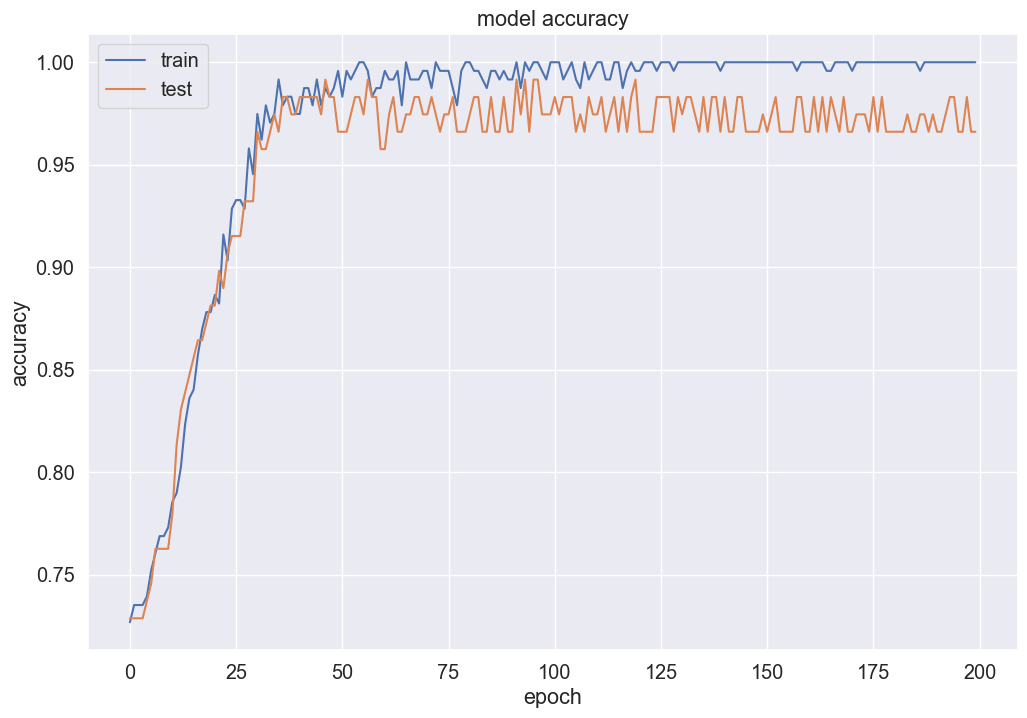

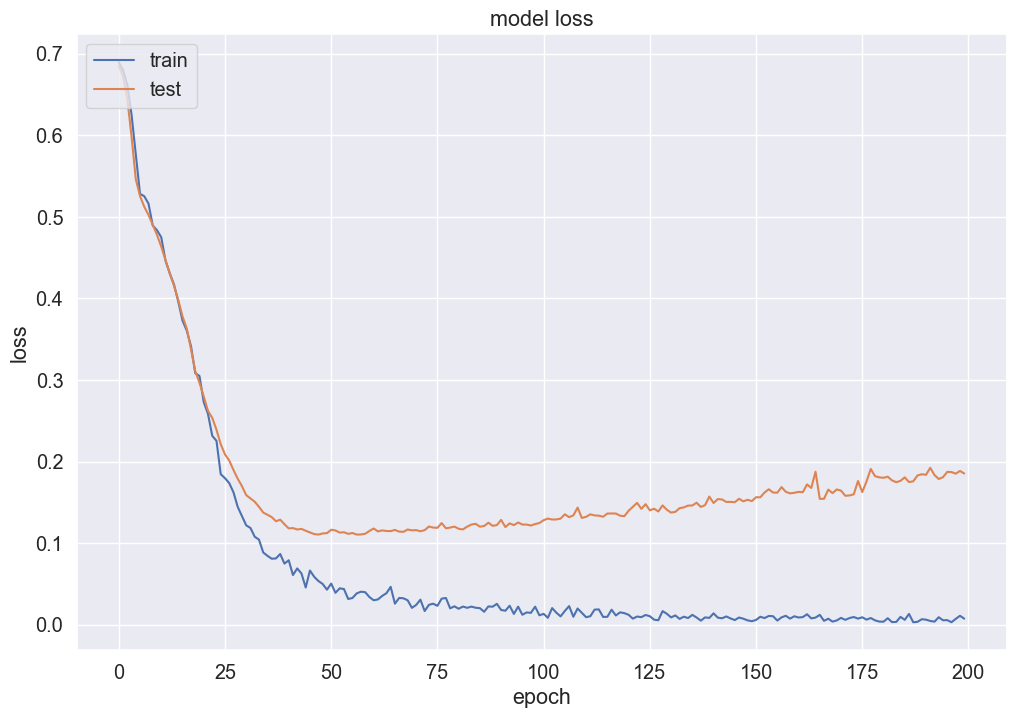

In [113]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [116]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 2ms/step
(153, 3)


,Test_Actual,Test_Probability,Test_Predicted
72,0,0.000002,0
326,0,0.000006,0
368,1,0.999999,1
115,0,0.000002,0
229,1,1.000000,1
314,0,0.000047,0
505,0,0.773349,1
478,0,0.000003,0
473,1,1.000000,1
224,1,1.000000,1


In [117]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(356, 3)


,Train_Actual,Train_Probability,Train_Predicted
273,1,9.949801e-01,1
219,1,1.000000e+00,1
69,0,2.726751e-06,0
2,0,1.030690e-13,0
254,1,9.999600e-01,1
84,0,3.189382e-07,0
43,0,5.658526e-07,0
385,1,1.000000e+00,1
173,0,3.593024e-04,0
507,0,4.444403e-07,0


In [118]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  94.0 %
Confusion Matrix for Test Data  =
 [[110   2]
 [  7  34]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       112
           1       0.94      0.83      0.88        41

    accuracy                           0.94       153
   macro avg       0.94      0.91      0.92       153
weighted avg       0.94      0.94      0.94       153



In [119]:
# print the classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  99.0 %
Confusion Matrix for Train Data  =
 [[256   3]
 [  1  96]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       259
           1       0.97      0.99      0.98        97

    accuracy                           0.99       356
   macro avg       0.98      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356



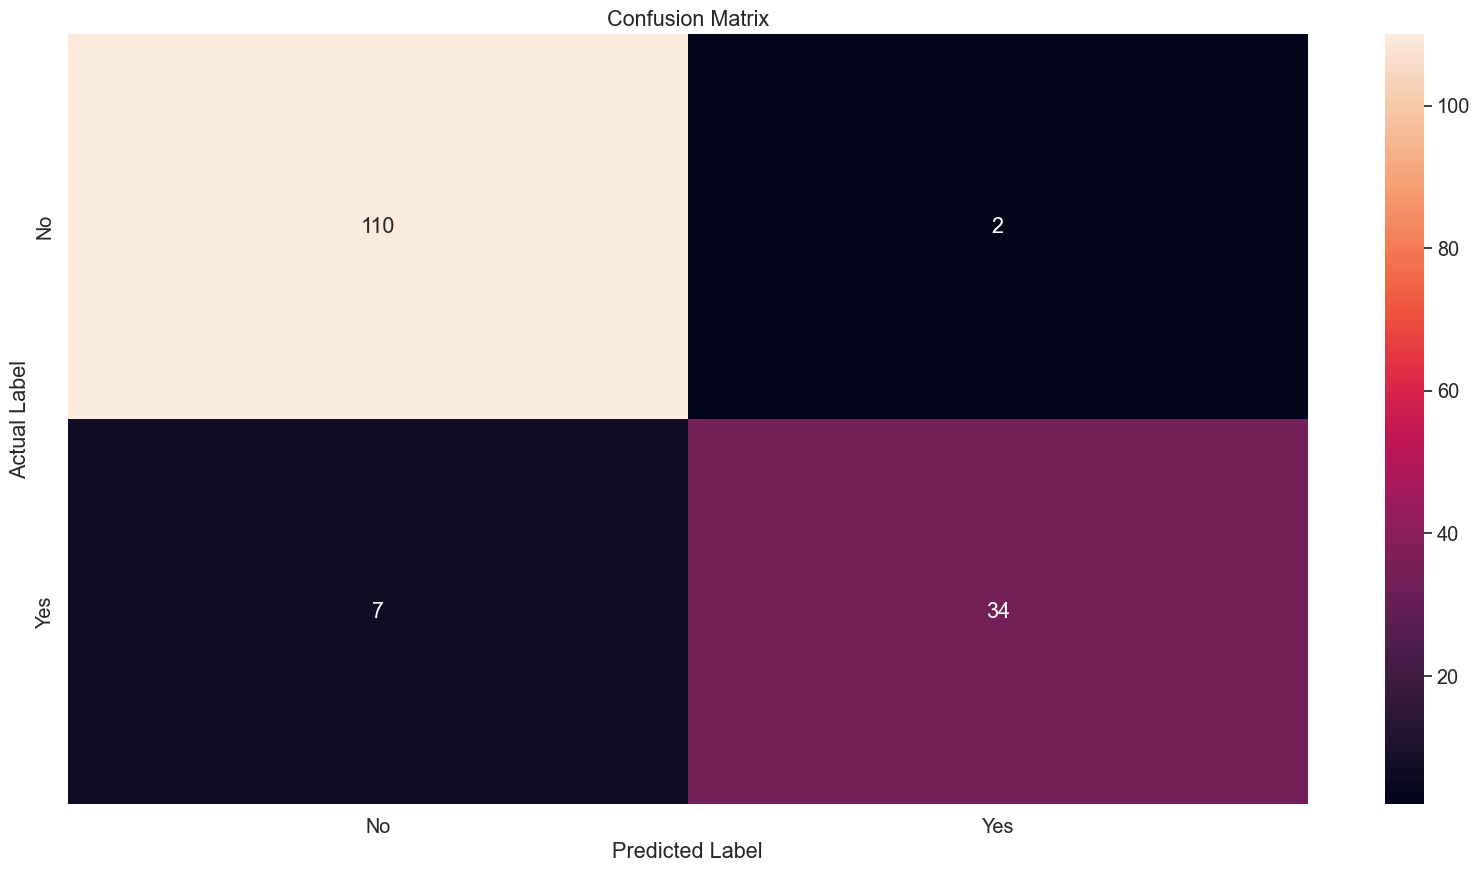

In [120]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()